In [1]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn import metrics


import matplotlib.pyplot as plt

In [2]:
import os
os.cpu_count()

4

In [3]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# look at the correlations with is_canceled
data.corr()['is_canceled'].sort_values()

deposit_type_No Deposit                 -0.477911
total_of_special_requests_minmax        -0.234658
required_car_parking_spaces_minmax      -0.195498
market_segment_Direct                   -0.154390
distribution_channel_Direct             -0.151620
booking_changes_minmax                  -0.144381
customer_type_Transient-Party           -0.124135
country_is_FRA                          -0.118254
country_is_DEU                          -0.107316
agent_7                                 -0.085588
is_repeated_guest                       -0.084793
market_segment_Corporate                -0.081667
distribution_channel_Corporate          -0.075428
agent_14                                -0.070246
previous_bookings_not_canceled_minmax   -0.057358
market_segment_Complementary            -0.039306
customer_type_Group                     -0.038698
winter                                  -0.037611
babies_minmax                           -0.032491
market_segment_Offline TA/TO            -0.028472


In [5]:
features = [
            'hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            "previous_cancellations_minmax",
            "previous_bookings_not_canceled_minmax",
            "booking_changes_minmax",
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [6]:
len(features)

51

In [7]:
X = data[features]
y = data[label]

In [8]:
# features selection - keep only the top 30 features
lr = LogisticRegression(solver='lbfgs',max_iter=500,n_jobs=os.cpu_count())

rfe = RFE(lr,30)
rfe = rfe.fit(X, y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True False False False  True False  True
  True False  True False  True  True False  True  True  True  True False
  True False False  True False  True False False  True False  True  True
  True  True  True  True  True False False False  True  True  True False
  True  True  True]
[13  3  1  4  1  1 11  8 18  1 16  1  1  5  1 14  1  1 17  1  1  1  1 21
  1 20  6  1  2  1  9  7  1 10  1  1  1  1  1  1  1 19 15 22  1  1  1 12
  1  1  1]


In [9]:
features_selected = []
for feature, is_selected in zip(features,rfe.support_):
    if is_selected:
        features_selected.append(feature)
print(len(features_selected),"\n",features_selected)

30 
 ['reserved_assigned_room_type_match', 'country_is_DEU', 'country_is_other', 'winter', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'meal_FB', 'meal_Undefined', 'deposit_type_Non Refund', 'customer_type_Transient', 'agent_14', 'agent_7', 'agent_is_other', 'log_lead_minmax', 'previous_cancellations_minmax', 'previous_bookings_not_canceled_minmax', 'booking_changes_minmax', 'adults_minmax', 'children_minmax', 'babies_minmax', 'adr_minmax', 'required_car_parking_spaces_minmax', 'total_of_special_requests_minmax']


In [10]:
X_new = data[features_selected]

In [11]:
y_act = y.values.ravel()

In [12]:
score_cv = cross_val_score(lr, X_new, y_act, cv=10)

In [13]:
score_cv.mean()

0.7914150058356085

In [14]:
lr.fit(X_new, y_act)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
coeff_df = pd.DataFrame(lr.coef_.flatten(), X_new.columns, columns=['Coefficient']); coeff_df

,Coefficient
reserved_assigned_room_type_match,1.779795
country_is_DEU,-0.337571
country_is_other,0.865701
winter,0.267417
distribution_channel_Direct,-0.506186
distribution_channel_GDS,-0.945546
distribution_channel_Undefined,2.051461
market_segment_Complementary,0.528233
market_segment_Corporate,-0.417008
market_segment_Groups,-0.275909


In [17]:
C = [1.0,5,10,20]

try_grid = [{'C':C}]

LRM_1 = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear', max_iter=1000),param_grid=try_grid,cv=10)
LRM_1.fit(X_new,y_act)
print(LRM_1.best_score_)
print(LRM_1.best_params_)

0.7961889605494598
{'C': 10}


In [19]:
LRM_1.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
penalty = ['l2']
solver = ['liblinear','newton-cg','lbfgs', 'sag', 'saga']
C = [10]

try_grid = [{'penalty': penalty, 
             'solver': solver,
             'C':C}]

LRM_2 = GridSearchCV(LogisticRegression(max_iter=1000,n_jobs=os.cpu_count()),param_grid=try_grid,cv=10)
LRM_2.fit(X_new,y_act)
print(LRM_2.best_score_)
print(LRM_2.best_params_)

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effectiv

0.7944467710863556
{'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [19]:
score_cv_1 = cross_val_score(LRM_1.best_estimator_, X_new, y_act, cv=10)
score_cv_1.mean()

0.796181070334948

In [20]:
score_cv_2 = cross_val_score(LRM_2.best_estimator_, X_new, y_act, cv=10)
score_cv_2.mean()

0.7944471662699408

In [22]:
y_pred = cross_val_predict(LRM_1.best_estimator_, X_new, y_act, cv=10)

In [23]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 84350, 1: 35040}

In [24]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_act, y_pred))
print("Accuracy:",accuracy_score(y_act, y_pred))

Confusion Matrix:
 [[67591  7575]
 [16759 27465]]
Accuracy: 0.7961805846385794


In [25]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     75166
           1       0.78      0.62      0.69     44224

    accuracy                           0.80    119390
   macro avg       0.79      0.76      0.77    119390
weighted avg       0.79      0.80      0.79    119390



**ROC**

In [26]:
# probablities for each prediction
proba_y = cross_val_predict(lr, X_new, y_act, cv=10, method='predict_proba')

In [27]:
# lower threshold for '0' to be 0.4
proba_y_0_lt= [0 if i >= 0.4 else 1 for i in proba_y[:,0]]

In [28]:
print("Confusion Matrix:", "\n"+str(confusion_matrix(y_act,proba_y_0_lt))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(y_act,proba_y_0_lt,normalize=True, sample_weight=None))+"\n")
print(classification_report(y_act,proba_y_0_lt))

Confusion Matrix: 
[[71349  3817]
 [21615 22609]]

Accuracy Score: 
0.786983834492001

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     75166
           1       0.86      0.51      0.64     44224

    accuracy                           0.79    119390
   macro avg       0.81      0.73      0.74    119390
weighted avg       0.80      0.79      0.77    119390



In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 0, 'False Positive Rate')

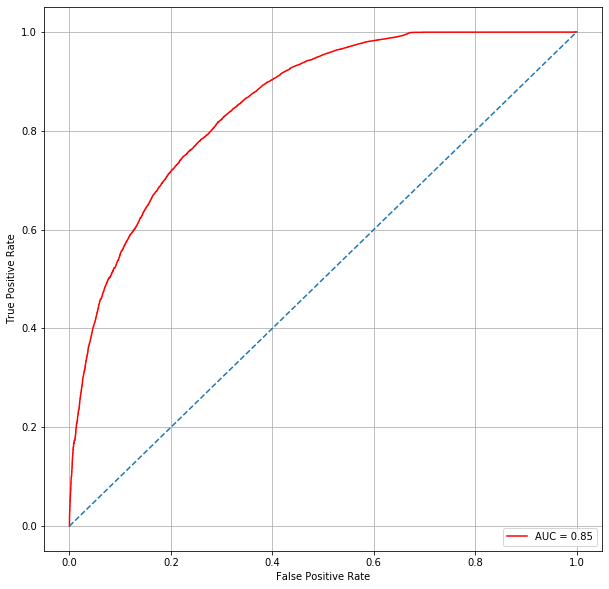

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_act,proba_y[:,0],pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [31]:
metrics.auc(fpr, tpr)

0.8547828036536249